# 지도시각화 test code

## 00. 기본 설정

In [3]:
# 데이터 분석을 위해 pandas를, 수치계산을 위해 numpy를, 시각화를 위해 seaborn을 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지는 출력되지 않게 합니다.
import warnings
warnings.filterwarnings("ignore")

In [4]:
# 주피터 노트북에서 그래프가 보이는 설정
%matplotlib notebook

In [5]:
# 한글 font 설정

import platform
import matplotlib.font_manager as fm

#matplotlib 패키지 한글 깨짐 처리 시작
#------------------------------------------------------------------------------------
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
    
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

#------------------------------------------------------------------------------------
#matplotlib 패키지 한글 깨짐 처리 끝

# windows
#plt.rcParams['font.family'] = "NanumBarunGothic" 또는 "Malgun Gothic"
#plt.rcParams['axes.unicode_minus'] = False

# apple 사용자는
#plt.rc("font", family="AppleGothic")
#plt.rc("axes", unicode_minus=False)

In [6]:
# 글씨 선명하게 출력하는 설정

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<IPython.core.display.Javascript object>


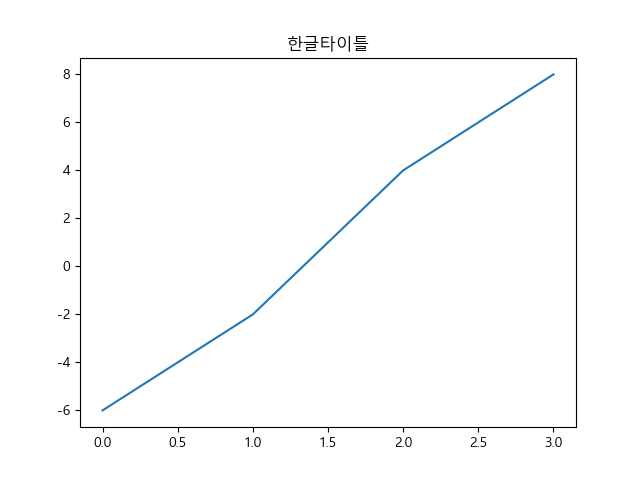

<Axes: title={'center': '한글타이틀'}>

In [8]:
# 한글폰트와 마이너스 폰트 설정 확인

pd.Series([-6, -2, 4, 8]).plot(title="한글타이틀")

In [9]:
plt.close('all')

## 01. 데이터 불러오기

In [12]:
df = pd.read_excel("data_prep_dd.xlsx")
df.head(3)

,YM,MCT_NM,OP_YMD,TYPE,MCT_TYPE,latitude,longitude,ADDR,RANK_CNT,RANK_AMT,...,HR_18_22_UE_CNT_RAT,HR_23_4_UE_CNT_RAT,LOCAL_UE_CNT_RAT,RC_M12_MAL_CUS_CNT_RAT,RC_M12_FME_CUS_CNT_RAT,RC_M12_AGE_UND_20_CUS_CNT_RAT,RC_M12_AGE_30_CUS_CNT_RAT,RC_M12_AGE_40_CUS_CNT_RAT,RC_M12_AGE_50_CUS_CNT_RAT,RC_M12_AGE_OVR_60_CUS_CNT_RAT
0,202301,희야네식당,20000916,T1,가정식,33.279498,126.719772,제주 서귀포시 남원읍 남원리 100-3번지,3,4,...,0.000000,0.0,0.381616,0.644,0.356,0.183,0.232,0.351,0.171,0.063
1,202301,희신이네,20060515,T1,가정식,33.263389,126.550838,제주 서귀포시 서홍동 1651-11번지,3,4,...,0.264706,0.0,0.701183,0.686,0.314,0.118,0.261,0.342,0.190,0.089
2,202301,흥미,20030814,T1,가정식,33.490006,126.495004,제주 제주시 연동 291-40번지,4,4,...,0.094340,0.0,0.736842,0.562,0.438,0.107,0.299,0.336,0.226,0.032


In [13]:
# 컬럼명 확인
df.columns

Index(['YM', 'MCT_NM', 'OP_YMD', 'TYPE', 'MCT_TYPE', 'latitude', 'longitude',
       'ADDR', 'RANK_CNT', 'RANK_AMT', 'RANK_MEAN', 'MON_UE_CNT_RAT',
       'TUE_UE_CNT_RAT', 'WED_UE_CNT_RAT', 'THU_UE_CNT_RAT', 'FRI_UE_CNT_RAT',
       'SAT_UE_CNT_RAT', 'SUN_UE_CNT_RAT', 'HR_5_11_UE_CNT_RAT',
       'HR_12_13_UE_CNT_RAT', 'HR_14_17_UE_CNT_RAT', 'HR_18_22_UE_CNT_RAT',
       'HR_23_4_UE_CNT_RAT', 'LOCAL_UE_CNT_RAT', 'RC_M12_MAL_CUS_CNT_RAT',
       'RC_M12_FME_CUS_CNT_RAT', 'RC_M12_AGE_UND_20_CUS_CNT_RAT',
       'RC_M12_AGE_30_CUS_CNT_RAT', 'RC_M12_AGE_40_CUS_CNT_RAT',
       'RC_M12_AGE_50_CUS_CNT_RAT', 'RC_M12_AGE_OVR_60_CUS_CNT_RAT'],
      dtype='object')

In [14]:
df.shape

(67857, 31)

In [15]:
# 현지인이 선택한 맛집 (LOCAK_UE_CNT_RAT)
# TYPE별 구별 위치 분포 (folium 지역/색상 시각화) [TYPE]
# 옵션 [SEASON]
# 계절 먼저 선택 >> 나이별 회원 수 비중이 높은 곳

In [18]:
# 현지인 이용 건수 비중 확인 먼저 >> 필요한 칼럼만 추출
col_names = ['YM', 'MCT_NM', 'TYPE', 'latitude', 'longitude', 'ADDR',
            'LOCAL_UE_CNT_RAT']

In [19]:
df_local = df[col_names]
df_local.head(1)

,YM,MCT_NM,TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT
0,202301,희야네식당,T1,33.279498,126.719772,제주 서귀포시 남원읍 남원리 100-3번지,0.381616


In [20]:
df_local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67857 entries, 0 to 67856
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YM                67857 non-null  int64  
 1   MCT_NM            67857 non-null  object 
 2   TYPE              67857 non-null  object 
 3   latitude          67857 non-null  float64
 4   longitude         67857 non-null  float64
 5   ADDR              67857 non-null  object 
 6   LOCAL_UE_CNT_RAT  67857 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 3.6+ MB


In [21]:
df_local.describe()

,YM,latitude,longitude,LOCAL_UE_CNT_RAT
count,67857.000000,67857.000000,67857.000000,67857.000000
mean,202306.478801,33.426563,126.519642,0.468005
std,3.445896,0.105855,0.153407,0.298131
min,202301.000000,33.114466,126.164116,0.000000
25%,202303.000000,33.325196,126.463624,0.159108
50%,202307.000000,33.483431,126.514001,0.501193
75%,202309.000000,33.498588,126.562812,0.753606
max,202312.000000,33.963670,126.969007,1.000000


## 02. 지도시각화

In [22]:
import folium

In [23]:
# 지도의 중심을 정하기 위해 위도와 경도의 평균을 구함
lat = df_local['latitude'].mean()
long = df_local['longitude'].mean()
lat, long

(33.4265627072358, 126.5196419999676)

In [24]:
# zoom_start로 화면 크기 지정
m = folium.Map([lat, long], zoom_start=10)
m

In [25]:
# 우선 테이블의 상위 5개 데이터만 지도에 표시
for i in df_local.index[:5]:
    sub_lat = df_local.loc[i, 'latitude']
    sub_long = df_local.loc[i, 'longitude']
    
    title = df_local.loc[i, 'MCT_NM'] + '-' + df_local.loc[i, 'ADDR']
    name = df_local.loc[i, 'MCT_NM']
    print(i, sub_lat, sub_long, title)
    
    folium.Marker([sub_lat, sub_long], tootip=title,
                  popup=name
                 ).add_to(m)
m

0 33.2794981 126.7197716 희야네식당-제주 서귀포시 남원읍 남원리 100-3번지
1 33.2633891 126.5508375 희신이네-제주 서귀포시 서홍동 1651-11번지
2 33.4900057 126.4950045 흥미-제주 제주시 연동 291-40번지
3 33.4273959 126.277767 흑심가-제주 제주시 한림읍 대림리 1221-1번지 1층
4 33.5303511 126.5893315 흑섬-제주 제주시 삼양일동 1940-3번지 1층


## 03. 현지인 비중 order by

In [39]:
df_local_rank = df_local.sort_values('LOCAL_UE_CNT_RAT', ascending=False)
df_local_rank.head(3)

,YM,MCT_NM,TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT
53600,202306,오리본가,T6,33.254554,126.571291,제주 서귀포시 동홍동 647-4번지,1.0
14642,202308,서부식당,T1,33.416824,126.263907,제주 제주시 한림읍 한림리 1314-134번지 1층,1.0
26746,202311,애플웨딩식당,T14,33.254144,126.549310,제주 서귀포시 서홍동 1346번지 충,1.0


In [41]:
# 인덱스 리셋
df_local_rank = df_local_rank.reset_index(drop=True)
df_local_rank.head(3)

,YM,MCT_NM,TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT
0,202306,오리본가,T6,33.254554,126.571291,제주 서귀포시 동홍동 647-4번지,1.0
1,202308,서부식당,T1,33.416824,126.263907,제주 제주시 한림읍 한림리 1314-134번지 1층,1.0
2,202311,애플웨딩식당,T14,33.254144,126.549310,제주 서귀포시 서홍동 1346번지 충,1.0


In [42]:
df_local_rank.shape

(67857, 7)

In [43]:
# 현지인 비중이 1인 식당은 총 113개 
count = df_local_rank[df_local_rank['LOCAL_UE_CNT_RAT'] == 1].shape[0]
count

113

In [44]:
# 각 월별 현지인 이용 비중이 가장 높은 상위 5개 식당을 추출
top_5_per_month = df_local_rank.groupby('YM').apply(lambda x: x.nlargest(5, 'LOCAL_UE_CNT_RAT')).reset_index(drop=True)
top_5_per_month

,YM,MCT_NM,TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT
0,202301,아띠랑,T6,33.245710,126.567081,제주 서귀포시 서귀동 163-11번지 남양오피스텔 101호,1.0
1,202301,도원유통,T15,33.487330,126.485356,제주 제주시 노형동 916-4번지 1층,1.0
2,202301,온기,T6,33.495023,126.546744,제주 제주시 이도이동 1952-5번지 지하1층,1.0
3,202301,제주씨푸드,T6,33.524111,126.589783,제주 제주시 삼양일동 1662-12번지,1.0
4,202301,금하순대,T6,33.441213,126.288633,제주 제주시 한림읍 귀덕리 2979번지,1.0
5,202302,도원유통,T15,33.487330,126.485356,제주 제주시 노형동 916-4번지 1층,1.0
6,202302,아띠랑,T6,33.245710,126.567081,제주 서귀포시 서귀동 163-11번지 남양오피스텔 101호,1.0
7,202302,비에이치,T25,33.476915,126.450666,제주 제주시 도평동 965-2번지,1.0
8,202302,화용다방,T26,33.248671,126.563087,제주 서귀포시 서귀동 275-7번지 2층,1.0
9,202302,제이엠,T6,33.487853,126.477963,제주 제주시 노형동 1065-8번지 3층,1.0


In [45]:
# 월별로 LOCAL_UE_CNT_RAT가 1인 식당의 개수 계산
local_rate_1 = df_local_rank[df_local_rank['LOCAL_UE_CNT_RAT'] == 1].groupby('YM').size()
local_rate_1

YM
202301     9
202302    12
202303    11
202304     9
202305     8
202306     9
202307    13
202308    12
202309     9
202310     8
202311     6
202312     7
dtype: int64

In [46]:
# TYPE별로 LOCAL_UE_CNT_RAT가 1인 식당의 개수 계산
type_rate_1 = df_local_rank[df_local_rank['LOCAL_UE_CNT_RAT'] == 1].groupby('TYPE').size()
type_rate_1

TYPE
T1     24
T11     1
T13     1
T14     1
T15     8
T18     1
T2      1
T20     5
T25     7
T26     4
T6     60
dtype: int64

In [47]:
df_local_rank.shape

(67857, 7)

In [48]:
highest_local_rate_by_type = df_local_rank.loc[df_local_rank.groupby(['YM', 'TYPE'])['LOCAL_UE_CNT_RAT'].idxmax()]
highest_local_rate_by_type

,YM,MCT_NM,TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT
35,202301,차화술,T1,33.509923,126.532849,제주 제주시 일도이동 1020-21번지 2층,1.000000
184,202301,떡마을,T10,33.496693,126.537965,제주 제주시 이도이동 1069-3번지,0.949153
34,202301,친구,T11,33.491800,126.479839,제주 제주시 연동 1953-3번지,1.000000
30118,202301,녹두네,T12,33.485072,126.484723,제주 제주시 노형동 939-7번지,0.570513
1348,202301,빵집이야기,T13,33.509263,126.536503,제주 제주시 일도이동 316번지 일도빌라 105호,0.898773
...,...,...,...,...,...,...,...
1066,202312,토대력올레점,T5,33.502363,126.542510,제주 제주시 이도이동 408-6번지,0.903805
38,202312,마음휴양소카페,T6,33.512901,126.531617,제주 제주시 일도일동 1067번지 1층,1.000000
14248,202312,던킨제주시청점,T7,33.500081,126.529235,제주 제주시 이도이동 1772-1번지,0.780774
3608,202312,한솥도시락 제주화북점,T8,33.519753,126.572361,제주 제주시 화북일동 1230번지,0.869822


In [50]:
highest_local_rate_by_type[highest_local_rate_by_type['YM'] == 202302]

,YM,MCT_NM,TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT
57,202302,미식가,T1,33.308245,126.164600,제주 제주시 한경면 고산리 3615-6번지,1.000000
1841,202302,떡하니,T10,33.497974,126.533970,제주 제주시 이도이동 1037번지 원영주택 1층 8호,0.890977
671,202302,밤은짧고요순살은맛있고맥주는차가워요,T11,33.515196,126.580346,제주 제주시 도련일동 1971-4번지 2층,0.913534
22694,202302,엉또민속주점,T12,33.250992,126.504983,제주 서귀포시 강정동 178-1번지,0.682927
252,202302,승쁨당삼화지구점,T13,33.517302,126.588278,제주 제주시 삼양이동 2332-7번지 1층,0.937500
3255,202302,칠성뷔페,T14,33.514637,126.525044,제주 제주시 일도일동 1298-28번지 4층,0.873744
11,202302,도원유통,T15,33.487330,126.485356,제주 제주시 노형동 916-4번지 1층,1.000000
3418,202302,롯데리아제주삼화지구점,T16,33.516288,126.580308,제주 제주시 도련일동 1938-5번지,0.872057
40827,202302,카우보이스테이크하우스,T17,33.278618,126.278613,제주 서귀포시 대정읍 보성리 161번지 1층,0.360190
1084,202302,아이스크림상회(베라체점),T18,33.494171,126.547728,제주 제주시 이도이동 1955-3번지 103호,0.903614


In [ ]:
# 우선 테이블의 상위 5개 데이터만 지도에 표시
for i in df_local.index[:5]:
    sub_lat = df_local.loc[i, 'latitude']
    sub_long = df_local.loc[i, 'longitude']
    
    title = df_local.loc[i, 'MCT_NM'] + '-' + df_local.loc[i, 'ADDR']
    name = df_local.loc[i, 'MCT_NM']
    print(i, sub_lat, sub_long, title)
    
    folium.Marker([sub_lat, sub_long], tootip=title,
                  popup=name
                 ).add_to(m)
m

이런식으로 지도 시각화를 할거야.